In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [18]:
dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Color",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1791 files belonging to 2 classes.


In [20]:
class_names1 = dataset1.class_names
class_names1

['pink', 'red']

In [21]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Contour",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1561 files belonging to 2 classes.


In [22]:
class_names2 = dataset2.class_names
class_names2

['normal', 'swallon']

In [23]:
dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Interdental Papilla",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1519 files belonging to 2 classes.


In [24]:
class_names3 = dataset3.class_names
class_names3

['enlarged', 'not_enlarged']

In [25]:
dataset4 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Calculus",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1818 files belonging to 2 classes.


In [26]:
class_names4 = dataset4.class_names
class_names4

['calculus_not_present', 'calculus_present']

In [12]:
for image_batch, labels_batch in dataset1.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0]


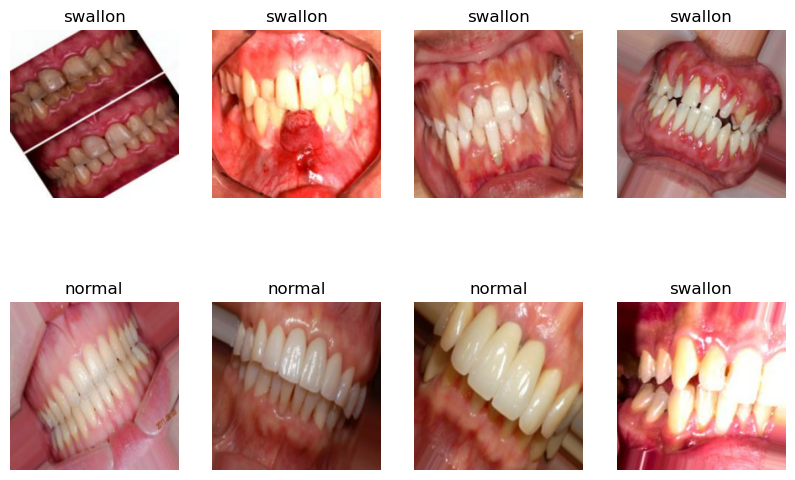

In [28]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset2.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names2[labels_batch[i]])
        plt.axis("off")

In [29]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [30]:
train_ds1, val_ds1, test_ds1 = get_dataset_partitions_tf(dataset1)
train_ds2, val_ds2, test_ds2 = get_dataset_partitions_tf(dataset2)
train_ds3, val_ds3, test_ds3 = get_dataset_partitions_tf(dataset3)
train_ds4, val_ds4, test_ds4 = get_dataset_partitions_tf(dataset4)

In [31]:
train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds1 = val_ds1.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds1 = test_ds1.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds2 = val_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
train_ds3 = train_ds3.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds3 = val_ds3.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds3 = test_ds3.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
train_ds4 = train_ds4.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds4 = val_ds4.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds4 = test_ds4.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [37]:
train_ds1 = train_ds1.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
train_ds2 = train_ds2.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
train_ds3 = train_ds3.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [40]:
train_ds4 = train_ds4.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [44]:
## Model1 build
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model1 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model1.build(input_shape=input_shape)

In [46]:
## Model2 build
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model2 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model2.build(input_shape=input_shape)

In [47]:
## Model3 build
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model3 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model3.build(input_shape=input_shape)

In [48]:
## Model4 build
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model4 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model4.build(input_shape=input_shape)

In [49]:
## Model1 compile
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
## Model2 compile
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
## Model3 compile
model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
## Model4 compile
model4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history1 = model1.fit(
    train_ds1,
    batch_size=BATCH_SIZE,
    validation_data=val_ds1,
    verbose=1,
    epochs=20,
)

Epoch 1/20
44/44 [==============================] - 95s 2s/step - loss: 0.5590 - accuracy: 0.6875 - val_loss: 0.3947 - val_accuracy: 0.8625
Epoch 2/20
44/44 [==============================] - 93s 2s/step - loss: 0.3350 - accuracy: 0.8672 - val_loss: 0.3031 - val_accuracy: 0.8687
Epoch 3/20
44/44 [==============================] - 85s 2s/step - loss: 0.2965 - accuracy: 0.8913 - val_loss: 0.2555 - val_accuracy: 0.9187
Epoch 4/20
44/44 [==============================] - 92s 2s/step - loss: 0.2441 - accuracy: 0.9055 - val_loss: 0.2773 - val_accuracy: 0.8813
Epoch 5/20
44/44 [==============================] - 112s 3s/step - loss: 0.2194 - accuracy: 0.9098 - val_loss: 0.2330 - val_accuracy: 0.9187
Epoch 6/20
44/44 [==============================] - 92s 2s/step - loss: 0.1947 - accuracy: 0.9233 - val_loss: 0.2631 - val_accuracy: 0.8938
Epoch 7/20
44/44 [==============================] - 82s 2s/step - loss: 0.1738 - accuracy: 0.9361 - val_loss: 0.2003 - val_accuracy: 0.9375
Epoch 8/20
44/44 [=

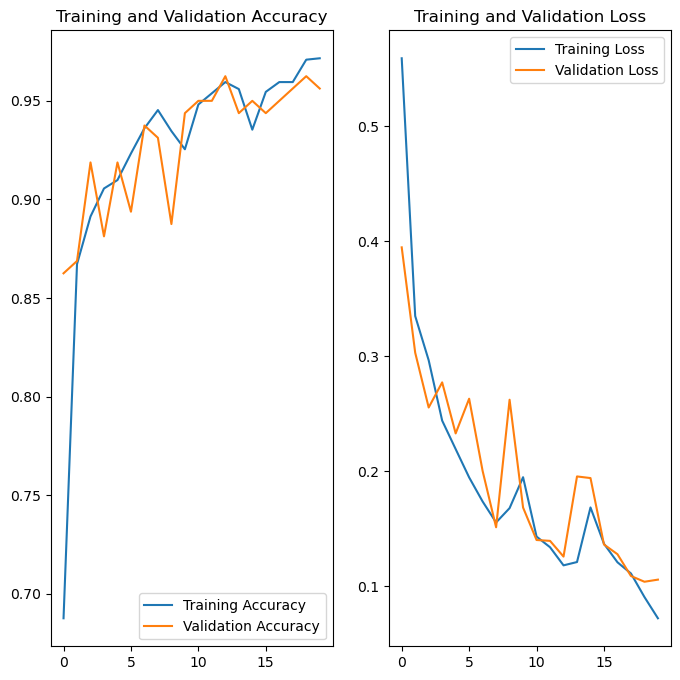

In [53]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc1, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss1, label='Training Loss')
plt.plot(range(EPOCHS), val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
import numpy as np

first image to predict
actual label: pink
1/1 [==============================] - 2s 2s/step
predicted label: pink


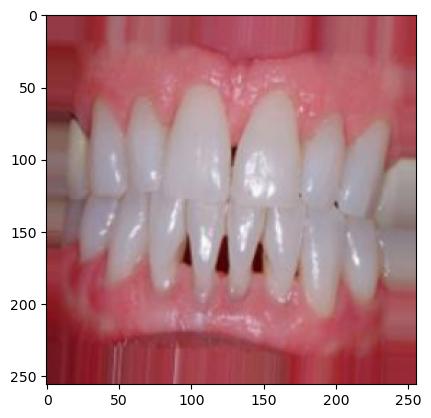

In [70]:
for images_batch, labels_batch in test_ds1.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names1[first_label])
    
    batch_prediction = model1.predict(images_batch)
    print("predicted label:",class_names1[np.argmax(batch_prediction[0])])

In [54]:
history2 = model2.fit(
    train_ds2,
    batch_size=BATCH_SIZE,
    validation_data=val_ds2,
    verbose=1,
    epochs=20,
)

Epoch 1/20
39/39 [==============================] - 94s 2s/step - loss: 0.6923 - accuracy: 0.5173 - val_loss: 0.6688 - val_accuracy: 0.5625
Epoch 2/20
39/39 [==============================] - 78s 2s/step - loss: 0.5842 - accuracy: 0.6857 - val_loss: 0.5576 - val_accuracy: 0.7500
Epoch 3/20
39/39 [==============================] - 83s 2s/step - loss: 0.5160 - accuracy: 0.7591 - val_loss: 0.5215 - val_accuracy: 0.7188
Epoch 4/20
39/39 [==============================] - 76s 2s/step - loss: 0.4654 - accuracy: 0.7857 - val_loss: 0.3419 - val_accuracy: 0.8594
Epoch 5/20
39/39 [==============================] - 70s 2s/step - loss: 0.3975 - accuracy: 0.8219 - val_loss: 0.2897 - val_accuracy: 0.8906
Epoch 6/20
39/39 [==============================] - 78s 2s/step - loss: 0.3587 - accuracy: 0.8413 - val_loss: 0.2456 - val_accuracy: 0.9141
Epoch 7/20
39/39 [==============================] - 102s 3s/step - loss: 0.3128 - accuracy: 0.8509 - val_loss: 0.1965 - val_accuracy: 0.9297
Epoch 8/20
39/39 [=

first image to predict
actual label: swallon
1/1 [==============================] - 0s 352ms/step
predicted label: swallon


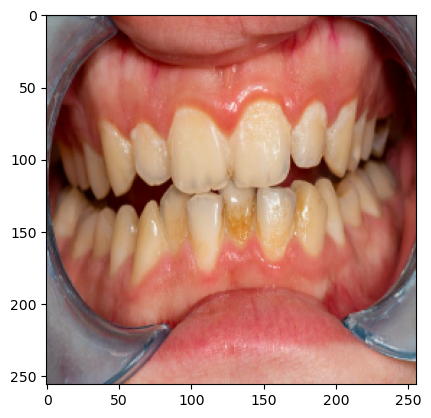

In [72]:
for images_batch, labels_batch in test_ds2.take(1):
    
    first_image = images_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names2[first_label])
    
    batch_prediction = model2.predict(images_batch)
    print("predicted label:",class_names2[np.argmax(batch_prediction[1])])

In [56]:
history3 = model3.fit(
    train_ds3,
    batch_size=BATCH_SIZE,
    validation_data=val_ds3,
    verbose=1,
    epochs=20,
)

Epoch 1/20
38/38 [==============================] - 88s 2s/step - loss: 0.6758 - accuracy: 0.5738 - val_loss: 0.6621 - val_accuracy: 0.5856
Epoch 2/20
38/38 [==============================] - 79s 2s/step - loss: 0.5691 - accuracy: 0.7198 - val_loss: 0.5278 - val_accuracy: 0.7207
Epoch 3/20
38/38 [==============================] - 68s 2s/step - loss: 0.4639 - accuracy: 0.7690 - val_loss: 0.4583 - val_accuracy: 0.7568
Epoch 4/20
38/38 [==============================] - 70s 2s/step - loss: 0.4318 - accuracy: 0.7765 - val_loss: 0.3927 - val_accuracy: 0.7748
Epoch 5/20
38/38 [==============================] - 69s 2s/step - loss: 0.3860 - accuracy: 0.8082 - val_loss: 0.4960 - val_accuracy: 0.7117
Epoch 6/20
38/38 [==============================] - 85s 2s/step - loss: 0.3736 - accuracy: 0.8182 - val_loss: 0.3993 - val_accuracy: 0.7568
Epoch 7/20
38/38 [==============================] - 83s 2s/step - loss: 0.3398 - accuracy: 0.8365 - val_loss: 0.3311 - val_accuracy: 0.8198
Epoch 8/20
38/38 [==

first image to predict
actual label: not_enlarged
1/1 [==============================] - 0s 434ms/step
predicted label: not_enlarged


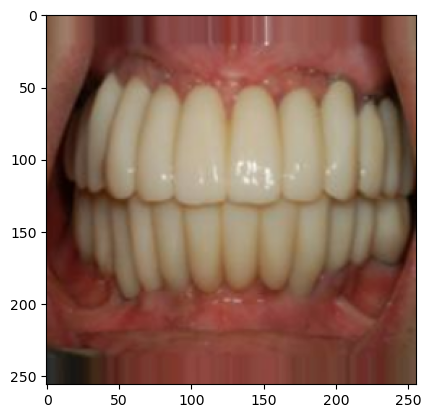

In [73]:
for images_batch, labels_batch in test_ds3.take(1):
    
    first_image = images_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names3[first_label])
    
    batch_prediction = model3.predict(images_batch)
    print("predicted label:",class_names3[np.argmax(batch_prediction[1])])

In [57]:
history4 = model4.fit(
    train_ds4,
    batch_size=BATCH_SIZE,
    validation_data=val_ds4,
    verbose=1,
    epochs=20,
)

Epoch 1/20
45/45 [==============================] - 105s 2s/step - loss: 0.5508 - accuracy: 0.6820 - val_loss: 0.2798 - val_accuracy: 0.8875
Epoch 2/20
45/45 [==============================] - 88s 2s/step - loss: 0.2921 - accuracy: 0.8821 - val_loss: 0.2019 - val_accuracy: 0.9250
Epoch 3/20
45/45 [==============================] - 87s 2s/step - loss: 0.2799 - accuracy: 0.8877 - val_loss: 0.2187 - val_accuracy: 0.9187
Epoch 4/20
45/45 [==============================] - 89s 2s/step - loss: 0.2502 - accuracy: 0.8926 - val_loss: 0.3151 - val_accuracy: 0.8562
Epoch 5/20
45/45 [==============================] - 86s 2s/step - loss: 0.2344 - accuracy: 0.9003 - val_loss: 0.1978 - val_accuracy: 0.9312
Epoch 6/20
45/45 [==============================] - 88s 2s/step - loss: 0.2234 - accuracy: 0.9045 - val_loss: 0.1690 - val_accuracy: 0.9375
Epoch 7/20
45/45 [==============================] - 85s 2s/step - loss: 0.2398 - accuracy: 0.9059 - val_loss: 0.1913 - val_accuracy: 0.9187
Epoch 8/20
45/45 [=

In [97]:
for images_batch, labels_batch in test_ds4.take(1):
    
#     first_image = images_batch[1].numpy().astype('uint8')
#     first_label = labels_batch[1].numpy()
    
#     print("first image to predict")
#     plt.imshow(first_image)
#     print("actual label:",class_names4[first_label])
    
#     batch_prediction = model4.predict(images_batch)
#     print("predicted label:",class_names4[np.argmax(batch_prediction[1])])
#       plt.imshow(images_batch[1].numpy().astype('uint8'))
      print(labels_batch[1])
    

tf.Tensor(0, shape=(), dtype=int32)


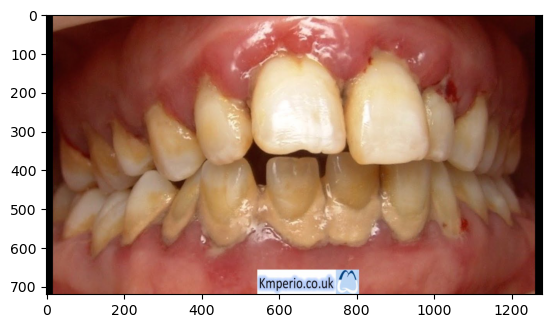

In [144]:
random_img = r'C:\Users\Yuvraj Pardeshi\Documents\sample_project_1\gum_disease\dataset\random3.jpg'
from PIL import Image
import numpy as np
img = Image.open(random_img)
numpydata = np.asarray(img)
plt.imshow(numpydata.astype('uint8'))

In [145]:
def predict(model, img, class_name):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [146]:
pred1,con1 = predict(model1,img,class_names1)
pred2,con2 = predict(model2,img,class_names2)
pred3,con3 = predict(model3,img,class_names3)
pred4,con4 = predict(model4,img,class_names4)

1/1 [==============================] - 0s 47ms/step


In [147]:
print("Model prediction for color : ",pred1)
print("Model prediction for contour : ",pred2)
print("Model prediction for interdental papilla : ",pred3)
print("Model prediction for calculus : ",pred4)

Model prediction for color :  pink
Model prediction for contour :  swallon
Model prediction for interdental papilla :  not_enlarged
Model prediction for calculus :  calculus_present


In [149]:
model.save('C:\Users\Yuvraj Pardeshi\Documents\sample_project_1\gum_disease\dataset\version')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1580875163.py, line 1)